In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('seti.xlsx', sheet_name='Товары')

In [8]:
data.head()

,Сеть,Название,Хранение,"Цена, руб","Фасовка, г",Цена за 1 кг,Производитель,Бренд
0,Глобус,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Азбука вкуса,Ножки кролика,Охлажденный,553.0,490.0,1128.571429,Бежин луг,NaN
2,Азбука вкуса,Филе кролика олажденное,Охлажденный,152.0,100.0,1520.000000,КРОЛЪ и К,NaN
3,Азбука вкуса,Тушка кролика,Охлажденный,1596.0,2000.0,798.000000,КФХ Шатурский фермер,NaN
4,Азбука вкуса,Фарш из кролика,Замороженный,490.0,500.0,980.000000,Арсеньевский м/к,Наша ферма


**Топ сетей, в которых больше всего продуктов из кролика**

In [24]:
top_net = data['Сеть'].value_counts().reset_index().head(10).rename(columns={'index':'net', 'Сеть':'count'})
top_net

,net,count
0,Metro,10
1,ВкусВилл,8
2,Азбука вкуса,5
3,Глобус Гурмэ,5
4,Лента,3
5,Перкресток,2
6,ТочкаМаркет,2
7,Виктория,1
8,Магнит,1
9,Монетка,1


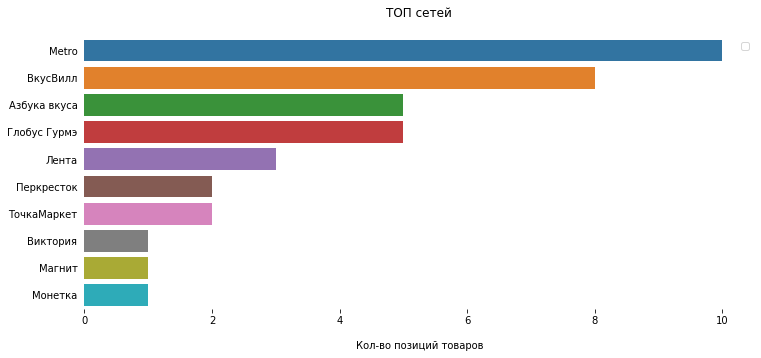

In [35]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП сетей', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="net", data=top_net)
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во позиций товаров', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Топ продуктов из кролика**

In [31]:
top_product = data['Название'].value_counts().reset_index().head(10).rename(columns={'index':'name', 'Название':'count'})
top_product 

,name,count
0,Тушка кролика,14
1,Ножки кролика,5
2,Печень кролика,2
3,Фарш из кролика,2
4,Пельмени с мясом кролика,2
5,"Ножки кролика, передние и задние",1
6,Тефтели из кролика с овощами,1
7,Фарш,1
8,Котелты из кролика жареные,1
9,Филе кролика олажденное,1


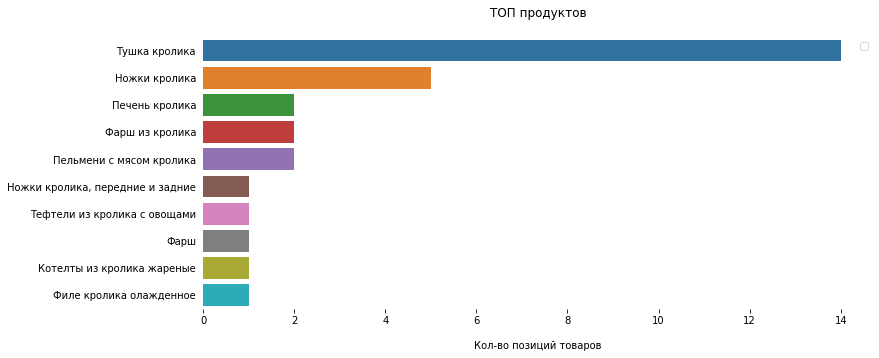

In [36]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП продуктов', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="name", data=top_product )
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во товаров в сетях', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Топ производителей**

In [37]:
top_produce = data['Производитель'].value_counts().reset_index().head(10).rename(columns={'index':'name', 'Производитель':'count'})
top_produce

,name,count
0,КРОЛЪ и К,11
1,Арсеньевские фермы,5
2,METRO CHEF,1
3,Кроликоферма Мазайцево,1
4,Бежин луг,1
5,Мозайцево,1
6,КФХ Шатурский фермер,1
7,«Оренбургский кролик»,1
8,Арсеньевский м/к,1
9,"ЛИПЕЦКИЙ КРОЛИК, ООО",1


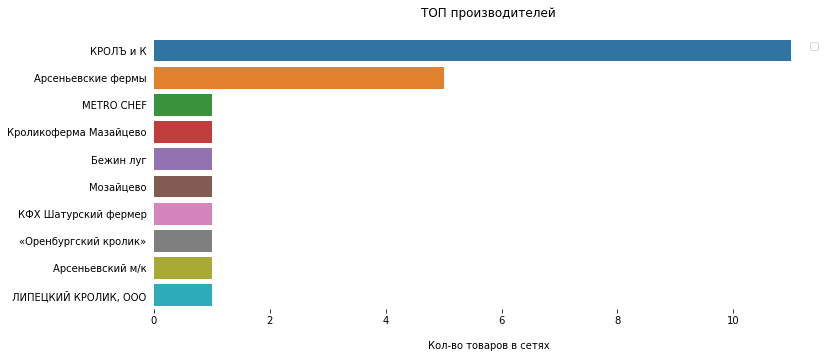

In [38]:
plt.subplots(figsize=(12, 5))
plt.title('ТОП производителей', pad=20)
plt.legend('')

ax = sns.barplot(x="count", y="name", data=top_produce)
ax.tick_params(labelleft=True, left=False) # выводить значения по оси y, черточки нет
ax.set_xlabel('Кол-во товаров в сетях', labelpad=15)
ax.set_ylabel('', labelpad=15)

sns.despine(left=True, bottom=True) # удалить линии границы

**Средняя цена за 1 кг для каждого вида продукта**

In [17]:
data.pivot_table(index='Название', values='Цена за 1 кг', aggfunc='mean').sort_values('Цена за 1 кг', ascending=False).reset_index().round()

,Название,Цена за 1 кг
0,Тефтели из кролика с овощами,2690.0
1,Котлеты из кролика жареные,2100.0
2,Котлеты из кролика паровые,2100.0
3,Ножки кролика передние,2097.0
4,Котлеты из кролика охлажденные,1790.0
5,Филе кролика олажденное,1520.0
6,Котелты из кролика жареные,1400.0
7,Пельмени с мясом кролика,1281.0
8,Котелты из кролика,1189.0
9,Котлеты из кролика,970.0
